<a href="https://colab.research.google.com/github/pswaldia/machineLearning-algorithms/blob/master/knnImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification task carried out with KNearest Neighbours with k=1**

In [0]:
import os
train_=os.listdir('cifar/train')

In [3]:
with open('cifar/labels.txt') as f:
  print(f.read())

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck



In [0]:
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [0]:
per_val=0.2
num_train=len(train_)
num_val=int(num_train*per_val)

**Extracting labels out of the image names**

In [0]:
label_=[]
for i in range(len(train_)):
  label_.append(train_[i].split('_')[1].split('.')[0])

**Manual Splitting of the train set into train and validation**

In [0]:
X_val,X_train,y_val,y_train=train_[:num_val],train_[num_val:],label_[:num_val],label_[num_val:]

In [0]:
train_set=[]
for img in X_train:
  train_set.append(plt.imread('cifar/train/'+img))

In [0]:
val_set=[]
for img in X_val:
  val_set.append(plt.imread('cifar/train/'+img))

Text(0.5, 1.0, 'frog')

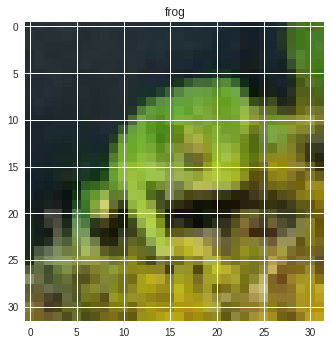

In [0]:
plt.imshow(train_set[0])
plt.title(y_train[0])

Text(0.5, 1.0, 'cat')

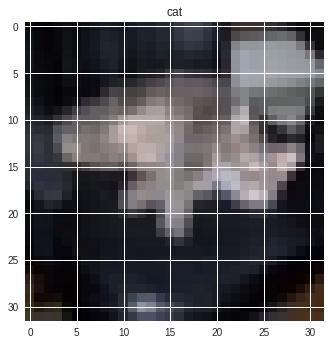

In [0]:
plt.imshow(val_set[0])
plt.title(y_val[0])


In [0]:
import os
test_=os.listdir('cifar/test')
  

In [0]:
test_set=[]
y_test=[]
for i in test_:
  test_set.append(plt.imread('cifar/test/'+i))
  y_test.append(i.split('_')[1].split('.')[0])
  

Text(0.5, 1.0, 'deer')

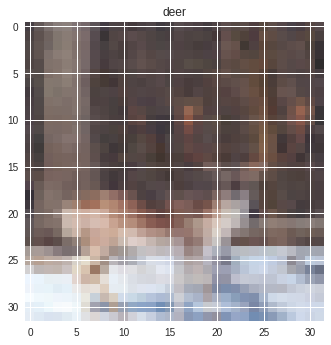

In [0]:
plt.imshow(test_set[0])
plt.title(y_test[0])

In [0]:
test_set=np.array(test_set)

In [0]:
train_set=np.array(train_set)


In [0]:
val_set=np.array(val_set)

In [0]:
train_set.shape

(40000, 32, 32, 3)

In [0]:
y_test=np.array(y_test)
y_train=np.array(y_train)
y_val=np.array(y_val)

In [0]:
train_set=train_set.reshape(train_set.shape[0],-1)
val_set=val_set.reshape(val_set.shape[0],-1)

In [0]:
test_set=test_set.reshape(test_set.shape[0],-1)

In [0]:
print('Training data shape: ', train_set.shape)
print('Training labels shape: ', np.array(y_train).shape)
print('Test data shape: ', test_set.shape)
print('Test labels shape: ', np.array(y_test).shape)

Training data shape:  (40000, 3072)
Training labels shape:  (40000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


In [0]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

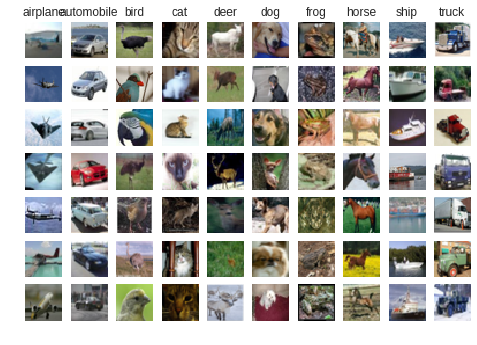

In [0]:
for y,cls in enumerate(classes):
  idxs=np.flatnonzero(np.array([cls==y_train[i] for i in range(y_train.shape[0])]))
  idxs=np.random.choice(idxs,samples_per_class,replace=False) 
  for i,idx in enumerate(idxs):
    plt_idx=i*num_classes+y+1
    plt.subplot(samples_per_class, num_classes, plt_idx)
    plt.imshow(train_set[idx].reshape(32,32,3))
   
    plt.axis('off')
    if i==0:
      plt.title(cls)
plt.show()   

In [0]:
num_training = 15000
num_test=500

In [0]:
X_train=train_set[:num_training]
y_train=y_train[:num_training]

In [0]:
X_test=test_set[:num_test]
y_test=y_test[:num_test]

In [0]:
class KNearestNeighbor(object):
  '''
  Nearest neighbors algorithm 
  with k=1 and L1 distance (Manhattan)
  '''
  def __init__(self):
    pass
  
  def train(self,X,y):
    self.X_train=X
    self.y_train=y
    
  def predict(self,X,k=1,num_loops=0):
    num_test=X.shape[0]
    y_pred=[]
    for i in range(num_test):
      distance=np.sum(np.abs(X_train-X_test[i]),axis=1)
      y_pred.append(y_train[np.argmin(distance)])
    return y_pred  
      
      

In [0]:
knn=KNearestNeighbor()

In [0]:
knn.train(X_train,y_train)

In [0]:
y_pred=knn.predict(X_test)

In [0]:
def accuracy(y_pred,y_test):
  print(np.mean(y_pred==y_test))

In [0]:
accuracy(y_pred,y_test)

0.354
